In [58]:
import numpy as np
import pandas as pd
import os
os.chdir('E:\studyingPy\C_card\lending_club')
from woebin import *
from var_filter import *
from perf import *
from scorecard import *
from splitdf import *
#from tree import *
from tqdm import tqdm
os.chdir('E:\studyingPy\C_card')

In [59]:
#加载模型
from sklearn.externals import joblib
lr=joblib.load('E:\studyingPy\C_card\lr.model')
tree = joblib.load('E:\studyingPy\C_card\\tree.model')
GBDT = joblib.load('E:\studyingPy\C_card\GBDT.model')

In [87]:
#加载验证集
testset = pd.read_csv('E:/studyingPy/C_card/testdata.csv',index_col = 'ID')

In [88]:
testset.shape

(63532, 52)

In [89]:
testset.columns

Index(['ID_NO_IDENT', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'JOB_TYPE', 'MARRIAGE',
       'ZIP_CODE', 'AGE', 'CASE_FROM', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'CUST_TYPE', 'LIMIT_RATE_1',
       'LIMIT_RATE_2', 'LIMIT_RATE_3', 'LIMIT_RATE_4', 'LIMIT_RATE_5',
       'LIMIT_RATE_6', 'REPAY_RATE_1', 'REPAY_RATE_2', 'REPAY_RATE_3',
       'REPAY_RATE_4', 'REPAY_RATE_5', 'REPAY_RATE_6', 'ALL_MON',
       'OVERDUE_CNT_3', 'OVERDUE_MAX_MON', 'USE_MON', 'Hrisk_rate',
       'Mrisk_rate', 'Lrisk_rate', 'XF_CNT_M', 'XF_AMT_M', 'RZ_CNT_M',
       'RZ_AMT_M', 'XF_AMT_CNT'],
      dtype='object')

In [90]:
important_feature=['ID_NO_IDENT','LIMIT_RATE_2', 'CASE_FROM', 'LIMIT_RATE_6', 'JOB_TYPE', 'LIMIT_RATE_1', 'RZ_CNT_M', 'LIMIT_RATE_4', 'Mrisk_rate', 'PAY_AMT6', 'PAY_4', 'PAY_3', 'REPAY_RATE_6', 'OVERDUE_CNT_3', 'LIMIT_RATE_3', 'XF_AMT_M', 'XF_CNT_M', 'XF_AMT_CNT', 'PAY_2', 'PAY_5', 'REPAY_RATE_4', 'LIMIT_RATE_5', 'PAY_1', 'REPAY_RATE_3', 'OVERDUE_MAX_MON', 'REPAY_RATE_2', 'PAY_AMT2', 'PAY_AMT5', 'Lrisk_rate', 'RZ_AMT_M', 'PAY_AMT3', 'REPAY_RATE_5', 'ZIP_CODE', 'LIMIT_BAL', 'PAY_6', 'PAY_AMT4', 'REPAY_RATE_1', 'PAY_AMT1']
#important_feature=['ID_NO_IDENT','LIMIT_RATE_2', 'CASE_FROM', 'LIMIT_RATE_6', 'LIMIT_RATE_1', 'RZ_CNT_M', 'LIMIT_RATE_4', 'Mrisk_rate', 'PAY_AMT6', 'PAY_4', 'PAY_3', 'REPAY_RATE_6', 'OVERDUE_CNT_3', 'LIMIT_RATE_3', 'XF_AMT_M', 'XF_CNT_M', 'XF_AMT_CNT', 'PAY_2', 'PAY_5', 'REPAY_RATE_4', 'LIMIT_RATE_5', 'PAY_1', 'REPAY_RATE_3', 'OVERDUE_MAX_MON', 'REPAY_RATE_2', 'PAY_AMT2', 'PAY_AMT5', 'Lrisk_rate', 'RZ_AMT_M', 'PAY_AMT3', 'REPAY_RATE_5', 'ZIP_CODE', 'LIMIT_BAL', 'PAY_6', 'PAY_AMT4', 'REPAY_RATE_1', 'PAY_AMT1']

In [91]:
test = testset[important_feature]

In [92]:
#查看数据的缺失程度
test.isnull().sum(axis=0).sort_values(ascending=False)/float(len(test))

PAY_AMT1           0.0
PAY_AMT6           0.0
XF_CNT_M           0.0
XF_AMT_M           0.0
LIMIT_RATE_3       0.0
OVERDUE_CNT_3      0.0
REPAY_RATE_6       0.0
PAY_3              0.0
PAY_4              0.0
Mrisk_rate         0.0
REPAY_RATE_1       0.0
LIMIT_RATE_4       0.0
RZ_CNT_M           0.0
LIMIT_RATE_1       0.0
JOB_TYPE           0.0
LIMIT_RATE_6       0.0
CASE_FROM          0.0
LIMIT_RATE_2       0.0
XF_AMT_CNT         0.0
PAY_2              0.0
PAY_5              0.0
REPAY_RATE_4       0.0
PAY_AMT4           0.0
PAY_6              0.0
LIMIT_BAL          0.0
ZIP_CODE           0.0
REPAY_RATE_5       0.0
PAY_AMT3           0.0
RZ_AMT_M           0.0
Lrisk_rate         0.0
PAY_AMT5           0.0
PAY_AMT2           0.0
REPAY_RATE_2       0.0
OVERDUE_MAX_MON    0.0
REPAY_RATE_3       0.0
PAY_1              0.0
LIMIT_RATE_5       0.0
ID_NO_IDENT        0.0
dtype: float64

In [93]:
#将测试集中支付码状态空调整为Z
test['PAY_1']=[*map(lambda x: 'Z' if str(x).isspace() else x,test['PAY_1'])]
test['PAY_2']=[*map(lambda x: 'Z' if str(x).isspace() else x,test['PAY_2'])]
test['PAY_3']=[*map(lambda x: 'Z' if str(x).isspace() else x,test['PAY_3'])]
test['PAY_4']=[*map(lambda x: 'Z' if str(x).isspace() else x,test['PAY_4'])]
test['PAY_5']=[*map(lambda x: 'Z' if str(x).isspace() else x,test['PAY_5'])]
test['PAY_6']=[*map(lambda x: 'Z' if str(x).isspace() else x,test['PAY_6'])]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [94]:
#将已保存好的bins_adj文件调用
import pickle
# 使用pickle包中的load函数把写入的文件反序列化
load_file = open('bins_adj.dat', 'rb')
# 把反序列化的信息读取出来
bins_adj = pickle.load(load_file)
load_file.close()

In [95]:
#convert test values into woe values
test_woe_all = pd.DataFrame()
for i in tqdm(test[important_feature[1:]].columns):
    test_woe = woebin_ply(test[[i]], bins_adj)
  #  test_woe = test_woe[i+'_woe']
    test_woe_all = pd.concat([test_woe_all,test_woe],axis = 1)
test[important_feature[1:]] = test_woe_all.copy()

100%|██████████████████████████████████████████| 37/37 [00:04<00:00,  7.93it/s]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [96]:
#Job_Type中有108个数据属于训练集没有的数据集，故为空
#查看数据的缺失程度
test.isnull().sum(axis=0).sort_values(ascending=False)/float(len(test))
#用0填充
test.fillna(0,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [97]:
X_test =test[important_feature[1:]]

In [98]:
X_test.shape

(63532, 37)

In [99]:
#应用模型进行预测
#result=lr.predict_proba(test[important_feature[1:]])
test_pred_lr = lr.predict_proba(X_test[important_feature[1:]])[:,1]
test_pred_tree = tree.predict_proba(X_test[important_feature[1:]])[:,1]
test_pred_GBDT = GBDT.predict_proba(X_test[important_feature[1:]])[:,1]

In [100]:
test_pred_lr

array([ 0.60062613,  0.44376191,  0.11525519, ...,  0.28237773,
        0.17097636,  0.46247512])

In [101]:
test_pred_tree

array([ 0.55151515,  0.14520202,  0.13468379, ...,  0.16994894,
        0.14520202,  0.13468379])

In [102]:
test_pred_GBDT

array([ 0.37073459,  0.38235487,  0.13369938, ...,  0.27057905,
        0.17895433,  0.29661668])

In [103]:
#查看预测结果

#对Y值重命名
data= testset.rename(columns={'CUST_TYPE':'loan_status'})

In [104]:
#违约状态定义  定义目标变量
def loan_status_coding(status_data,dic):
    temp_data=pd.Series(status_data,copy=True)
    for key,values in dic.items():
        temp_data.replace(key,values,inplace=True)
    return temp_data
data['loan_status']=loan_status_coding(data['loan_status'],
                                       {'G':0,'B':1})
#获得y变量
y_test = data.loan_status

E:\studyingPy\C_card\lending_club\perf.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  ], ignore_index=True)


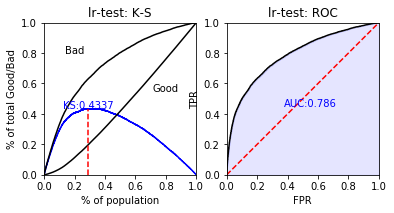

In [145]:
#画出逻辑回归证集的ROC和KS曲线
test_perf = perf_eva(y_test, test_pred_lr, title = "lr-test")

E:\studyingPy\C_card\lending_club\perf.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  ], ignore_index=True)


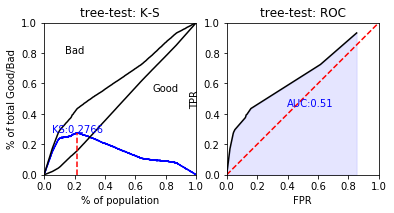

In [137]:
#画出决策树的ROC和KS曲线
test_perf = perf_eva(y_test, test_pred_tree, title = "tree-test")

E:\studyingPy\C_card\lending_club\perf.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  ], ignore_index=True)


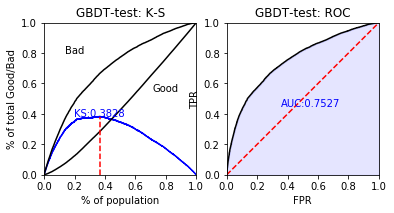

In [107]:
#画出梯度提升树证集的ROC和KS曲线
test_perf = perf_eva(y_test, test_pred_GBDT, title = "GBDT-test")

In [125]:
len(y_test)

63532

In [126]:
len(test_pred_lr)

63532

In [140]:
#自行定义cutoff值
cutoff = sum(test_pred_lr)/len(test_pred_lr)
y_pred = [*map(lambda x:0 if x< cutoff else 1,test_pred_lr)]

In [143]:
#获得逻辑回归的预测效果
import pandas as pd
from sklearn import ensemble,cross_validation, metrics
#y_pred = lr.predict(X_test[important_feature[1:]])
Acc = metrics.accuracy_score(y_test, y_pred)
Rec = metrics.recall_score(y_test, y_pred)
print( "Accuracy : %.4g" % Acc)
print("Recall :%.4g" % Rec)
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy : 0.756
Recall :0.6447
AUC Score (Testing): 0.715549


In [136]:
#获得决策树的预测效果
y_pred = tree.predict(X_test[important_feature[1:]])
Acc = metrics.accuracy_score(y_test, y_pred)
Rec = metrics.recall_score(y_test, y_pred)
print( "Accuracy : %.4g" % Acc)
print("Recall :%.4g" % Rec)
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, test_pred_tree))

Accuracy : 0.8058
Recall :0.171
AUC Score (Testing): 0.651069


In [135]:
#获得梯度提升树的预测效果
y_pred = GBDT.predict(X_test[important_feature[1:]])
Acc = metrics.accuracy_score(y_test, y_pred)
Rec = metrics.recall_score(y_test, y_pred)
print( "Accuracy : %.4g" % Acc)
print("Recall :%.4g" % Rec)
print ("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, test_pred_GBDT))

Accuracy : 0.7921
Recall :0.04294
AUC Score (Testing): 0.752735


In [110]:
test_pred = test_pred_lr

In [117]:
test["Prob_for_Bad"]=test_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
test.shape

(63532, 39)

In [119]:
result = test[['ID_NO_IDENT','Prob_for_Bad']]

In [120]:
result.to_csv("result.csv",index)